# **Boston Housing Data - Data Analysis using Hive on Spark**


## **Running Hive on Pyspark in Colab**

Prepare PySpark Cluster

In [1]:
# install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

##**Run a local spark session to test your installation**

In [3]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
#spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession.builder.master("local[*]").enableHiveSupport().getOrCreate()


##**Show Existing Databases**

In [4]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [5]:
# Task: Delete the "bostonh" database
database_name = "bostonh"
drop_database_query = f"DROP DATABASE IF EXISTS {database_name} CASCADE"

# Execute the query using spark.sql
# spark.sql(drop_database_query)


##**Create a New Database**

In [6]:
spark.sql("CREATE DATABASE BostonH")

DataFrame[]

In [7]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  bostonh|
|  default|
+---------+



##**Upload Data to Working Directory**

In [8]:
from google.colab import files
files.upload()

Saving BostonHousing.csv to BostonHousing.csv


{'BostonHousing.csv': b'"crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"\n0.00632,18,2.31,"0",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,"0",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\n0.02729,0,7.07,"0",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\n0.03237,0,2.18,"0",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\n0.06905,0,2.18,"0",0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\n0.02985,0,2.18,"0",0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\n0.08829,12.5,7.87,"0",0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\n0.14455,12.5,7.87,"0",0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\n0.21124,12.5,7.87,"0",0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\n0.17004,12.5,7.87,"0",0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\n0.22489,12.5,7.87,"0",0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\n0.11747,12.5,7.87,"0",0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\n0.09378,12

## **Load Data to Spark Cluster**

In [9]:
dataset = spark.read.csv('BostonHousing.csv',inferSchema=True, header =True)
dataset.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

##**Save the DataFrame as a Hive table in the "bostonh" database**

In [10]:
dataset.write.mode("overwrite").saveAsTable("bostonh.BostonHousing")

## **Show data from Hive Table**

In [11]:
dataset.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



###**Task 1: Data Overview**
1.   Retrieve and display the first 5 rows of the dataset to get a sense of the data's structure.
2.   Find and report the total number of records in the dataset.




In [12]:
# Task 1.1: Retrieve and display the first 5 rows of the dataset
dataset = spark.sql("SELECT * FROM bostonh.BostonHousing LIMIT 5")
dataset.show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [13]:
# Task 1.2: Find and report the total number of records in the dataset
total_records = spark.sql("SELECT COUNT(*) AS total_records FROM bostonh.BostonHousing").collect()[0]["total_records"]
print("Total number of records in the dataset:", total_records)

Total number of records in the dataset: 506


###**Task 2: Descriptive Statistics**

1.   Calculate and display basic statistics (mean, standard deviation, min, max) for the "medv" (median home value) column.
2.   Calculate and display the mean "rm" (average number of rooms per dwelling).

In [14]:
# Task 2.1: Calculate and display statistics for the "medv" column
result = spark.sql("SELECT count(medv), mean(medv), stddev(medv), min(medv), max(medv) FROM bostonh.BostonHousing")
result.show()

+-----------+------------------+-----------------+---------+---------+
|count(medv)|        mean(medv)|     stddev(medv)|min(medv)|max(medv)|
+-----------+------------------+-----------------+---------+---------+
|        506|22.532806324110698|9.197104087379815|      5.0|     50.0|
+-----------+------------------+-----------------+---------+---------+



In [15]:
# Task 2.2: Calculate and display the mean of the "rm" column
mean_rm = spark.sql("SELECT mean(rm) AS mean_rm FROM bostonh.BostonHousing")
mean_rm.show()


+-----------------+
|          mean_rm|
+-----------------+
|6.284634387351787|
+-----------------+



### **Task 3: Data Exploration**

1.   Identify the property with the highest crime rate ("crim"). Provide details about this property.
2.   Find and report the property with the lowest median home value ("medv"). Include its details.

In [16]:
# Task 3.1: Find the property with the highest crime rate
highest_crim_property = spark.sql("SELECT * FROM bostonh.BostonHousing WHERE crim = (SELECT MAX(crim) FROM bostonh.BostonHousing)")
highest_crim_property.show()


+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|88.9762|0.0| 18.1|   0|0.671|6.968|91.9|1.4165| 24|666|   20.2|396.9|17.21|10.4|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+



In [17]:
# Task 3.2: Find the property with the lowest median home value
lowest_medv_property = spark.sql("SELECT * FROM bostonh.BostonHousing WHERE medv = (SELECT MIN(medv) FROM bostonh.BostonHousing)")
lowest_medv_property.show()


+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|38.3518|0.0| 18.1|   0|0.693|5.453|100.0|1.4896| 24|666|   20.2| 396.9|30.59| 5.0|
|67.9208|0.0| 18.1|   0|0.693|5.683|100.0|1.4254| 24|666|   20.2|384.97|22.98| 5.0|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+



###**Task 4: Data Distribution Analysis**

1.   Create a histogram showing the distribution of the "age" column.
2.   Calculate and report the percentage of properties with a "chas" value of 1 (indicating proximity to the Charles River).

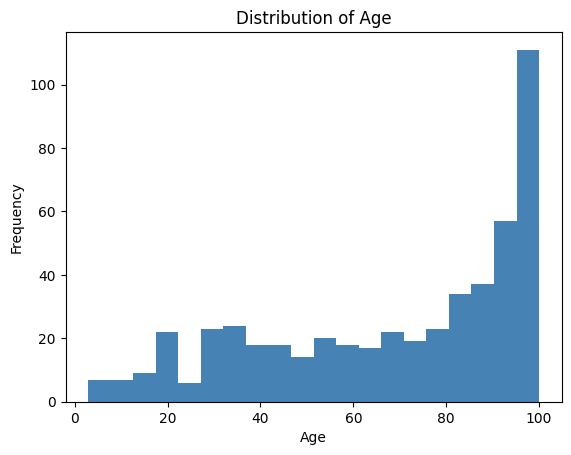

In [18]:
# Task 4.1: Create a histogram showing the distribution of the "age" column.

# Use Spark SQL to retrieve the "age" column from the Hive table
age_data = spark.sql("SELECT age FROM bostonh.BostonHousing").toPandas()

# Import necessary libraries
import matplotlib.pyplot as plt

# Create a histogram
plt.hist(age_data['age'], bins=20, color='steelblue')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Show the histogram
plt.show()


In [19]:
# Task 4.2: Calculate and report the percentage of properties with a "chas" value of 1 (indicating proximity to the Charles River).
# Calculate the percentage of properties with "chas" value of 1
total_properties = spark.sql("SELECT COUNT(*) FROM bostonh.BostonHousing").collect()[0][0]
chas_properties = spark.sql("SELECT COUNT(*) FROM bostonh.BostonHousing WHERE chas = 1").collect()[0][0]

percentage_chas = (chas_properties / total_properties) * 100

print(f"Percentage of properties with 'chas' value of 1: {percentage_chas:.2f}%")


Percentage of properties with 'chas' value of 1: 6.92%


### **Task 5: Correlation Analysis**

1.   Calculate the correlation coefficient between "rm" and "medv." Explain the relationship between the average number of rooms and median home value.
2.   Investigate if there is any correlation between "ptratio" (pupil-teacher ratio) and "nox" (nitrogen oxide concentration). Report your findings.


In [20]:
# Task 5.1: Calculate the correlation coefficient between "rm" and "medv"
correlation_result = spark.sql("SELECT corr(rm, medv) as correlation FROM bostonh.BostonHousing").collect()[0]['correlation']

print(f"Correlation coefficient between 'rm' and 'medv': {correlation_result:.4f}")

# Interpret the relationship
if correlation_result > 0:
    print("There is a positive correlation between the average number of rooms ('rm') and median home value ('medv').")
elif correlation_result < 0:
    print("There is a negative correlation between 'rm' and 'medv'.")
else:
    print("There is little to no linear correlation between 'rm' and 'medv'.")


Correlation coefficient between 'rm' and 'medv': 0.6954
There is a positive correlation between the average number of rooms ('rm') and median home value ('medv').


The calculated correlation coefficient of 0.6954 indicates a strong positive correlation between the average number of rooms ("rm") and the median home value ("medv"). This indicates that as the average number of rooms in a dwelling increases, the median home value tends to increase as well.

In [21]:
# Task 5.2: Calculate the correlation coefficient between "ptratio" and "nox"
correlation_result = spark.sql("SELECT corr(ptratio, nox) as correlation FROM bostonh.BostonHousing").collect()[0]['correlation']

print(f"Correlation coefficient between 'ptratio' and 'nox': {correlation_result:.4f}")

# Interpret the correlation
if correlation_result > 0:
    print("There is a positive correlation between pupil-teacher ratio ('ptratio') and nitrogen oxide concentration ('nox').")
elif correlation_result < 0:
    print("There is a negative correlation between 'ptratio' and 'nox'.")
else:
    print("There is little to no linear correlation between 'ptratio' and 'nox'.")


Correlation coefficient between 'ptratio' and 'nox': 0.1889
There is a positive correlation between pupil-teacher ratio ('ptratio') and nitrogen oxide concentration ('nox').



The calculated correlation coefficient between "ptratio" (pupil-teacher ratio) and "nox" (nitrogen oxide concentration) is 0.1889, indicating a weak positive correlation. This correlation suggests that there may be some connection between these variables, but it is not a strong or direct relationship, and other factors likely contribute more significantly to nitrogen oxide levels.

### **Task 6: Advanced Querying**

1.   Write a HiveQL query to identify and display the top 5 neighborhoods with the highest median home values ("medv").
2.   Calculate and report the average property age for neighborhoods with a "chas" value of 1 compared to those with "chas" value of 0.

In [22]:
# Task 6.1: Identify the top 5 neighborhoods with the highest median home values
top_neighborhoods = spark.sql("SELECT * FROM bostonh.BostonHousing ORDER BY medv DESC LIMIT 5")
top_neighborhoods.show()


+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|1.51902| 0.0|19.58|   1|0.605|8.375|93.9| 2.162|  5|403|   14.7|388.45| 3.32|50.0|
|0.01381|80.0| 0.46|   0|0.422|7.875|32.0|5.6484|  4|255|   14.4|394.23| 2.97|50.0|
|2.01019| 0.0|19.58|   0|0.605|7.929|96.2|2.0459|  5|403|   14.7| 369.3|  3.7|50.0|
|1.83377| 0.0|19.58|   1|0.605|7.802|98.2|2.0407|  5|403|   14.7|389.61| 1.92|50.0|
|1.46336| 0.0|19.58|   0|0.605|7.489|90.8|1.9709|  5|403|   14.7|374.43| 1.73|50.0|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [23]:
# Task 6.2: Calculate and report the average property age for neighborhoods with a "chas" value of 1 compared to those with "chas" value of 0.
# Calculate the average property age for neighborhoods with chas=1
avg_age_chas_1 = spark.sql("SELECT AVG(age) as avg_age_chas_1 FROM bostonh.BostonHousing WHERE chas = 1").collect()[0]['avg_age_chas_1']

# Calculate the average property age for neighborhoods with chas=0
avg_age_chas_0 = spark.sql("SELECT AVG(age) as avg_age_chas_0 FROM bostonh.BostonHousing WHERE chas = 0").collect()[0]['avg_age_chas_0']

# Report the results
print(f"Average property age for neighborhoods with chas=1: {avg_age_chas_1:.2f} years")
print(f"Average property age for neighborhoods with chas=0: {avg_age_chas_0:.2f} years")


Average property age for neighborhoods with chas=1: 77.50 years
Average property age for neighborhoods with chas=0: 67.91 years


### **Task 7: Visualization**

1.   Create a Hive view named "property_age_view" that includes the "age" and "medv" columns.
2.   Plot a scatter plot of property age against median home value using a data visualization tool of your choice.

In [24]:
# Task 7.1: Create a Hive view named "property_age_view"
spark.sql("""
CREATE OR REPLACE VIEW property_age_view AS
SELECT age, medv
FROM bostonh.BostonHousing
""")

# View the data from the Hive view
view_data = spark.sql("SELECT * FROM property_age_view")
view_data.show(5)

+----+----+
| age|medv|
+----+----+
|65.2|24.0|
|78.9|21.6|
|61.1|34.7|
|45.8|33.4|
|54.2|36.2|
+----+----+
only showing top 5 rows



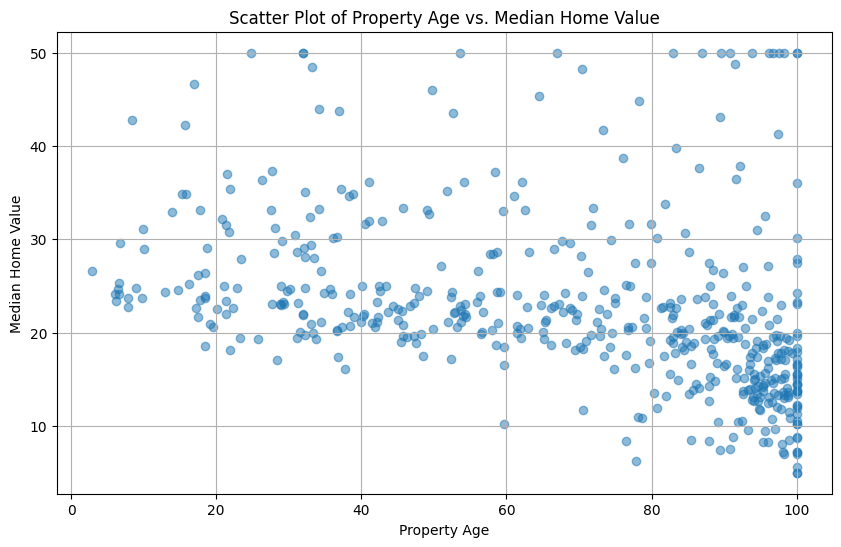

In [25]:
# Task 7.2: Plot a scatter plot of property age against median home value using a data visualization tool of your choice.
# Convert the data from the Hive view to Pandas Dataframe
view_data = spark.sql("SELECT age, medv FROM property_age_view").toPandas()

# Import necessary libraries
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(view_data['age'], view_data['medv'], alpha=0.5)
plt.title('Scatter Plot of Property Age vs. Median Home Value')
plt.xlabel('Property Age')
plt.ylabel('Median Home Value')
plt.grid(True)

# Show the scatter plot
plt.show()

### **Task 8: Outliers Detection**

1.   Write a query to identify and report properties with a "crim" value greater than 10 (considered as potential outliers).
2.   Discuss the significance of detecting outliers in data analysis.

In [26]:
# Task 8.1: Write a query to identify and report properties with a "crim" value greater than 10 (considered as potential outliers).
# Run a SQL query to identify potential outliers
outliers_crim = spark.sql("SELECT * FROM bostonh.BostonHousing WHERE crim > 10")

# Show the properties with "crim" values greater than 10
outliers_crim.show(5)

# Count the number of potential outliers
outliers_crim_count = outliers_crim.count()

# Print the count
print("Number of properties with 'crim' greater than 10:", outliers_crim_count)

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|13.5222|0.0| 18.1|   0|0.631|3.863|100.0|1.5106| 24|666|   20.2|131.42|13.33|23.1|
|11.1081|0.0| 18.1|   0|0.668|4.906|100.0|1.1742| 24|666|   20.2| 396.9|34.77|13.8|
|18.4982|0.0| 18.1|   0|0.668|4.138|100.0| 1.137| 24|666|   20.2| 396.9|37.97|13.8|
|19.6091|0.0| 18.1|   0|0.671|7.313| 97.9|1.3163| 24|666|   20.2| 396.9|13.44|15.0|
| 15.288|0.0| 18.1|   0|0.671|6.649| 93.3|1.3449| 24|666|   20.2|363.02|23.24|13.9|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
only showing top 5 rows

Number of properties with 'crim' greater than 10: 54


# Task 8.2: Discuss the significance of detecting outliers in data analysis.

Outliers are data points that are significantly different from the other data points in a dataset. They can have a big impact on statistical analyses and can distort research results. Detecting outliers is an important step in data analysis for several reasons:

**Data Quality Assurance:** Outliers can be the result of data entry errors, measurement errors, or other data quality issues. Identifying and addressing outliers is essential for maintaining data accuracy and reliability.

**Impact on Descriptive Statistics:** Outliers can significantly affect descriptive statistics such as the mean, standard deviation, and median. Removing or appropriately handling outliers ensures that these statistics accurately represent the central tendency and variability of the data.

**Model Assumptions:** Many statistical and machine learning models assume that data follows a specific distribution or has homoscedasticity (constant variance). Outliers can violate these assumptions, leading to model inaccuracies. Identifying and addressing outliers is essential for model reliability.

**Influence on Correlations:** Outliers can distort the relationships between variables. They may create spurious correlations or hide meaningful associations. Detecting and handling outliers is vital for uncovering genuine patterns and relationships in the data.

**Anomaly Detection:** In fields like finance and risk analysis, outliers can represent extreme events or anomalies that have a significant impact. Identifying and understanding these outliers is essential for risk assessment and decision-making.

**Data Interpretation:** Outliers can distort the interpretation of data. For example, in healthcare, an outlier in patient data may represent an unusual medical condition that warrants special attention. Identifying such outliers can be critical for patient care.

**Bias and Generalization:** In machine learning, models may be sensitive to outliers, leading to biased predictions or poor generalization. Properly managing outliers can improve the performance and fairness of machine learning models.

**Special Cases:** In certain cases, outliers may not represent errors but rather special cases of interest. Identifying such outliers can lead to new discoveries or insights. Unusual data points may be indicative of previously unknown phenomena or phenomena that require further investigation.

### **Task 9: Hypothesis Testing**

1.   Formulate a hypothesis about the impact of the "rm" (average number of rooms) on median home value.
2.   Conduct a hypothesis test using HiveQL to determine if there is a statistically significant relationship between these variables.

Task 9.1: **Formulate the Hypotheses:**


**Null Hypothesis (H0):** The average number of rooms ("rm") does not have a significant impact on median home value ("medv").
**Alternative Hypothesis (H1):** The average number of rooms ("rm") has a significant impact on median home value ("medv").

In [49]:
# Task 9.2: Conduct a hypothesis test using HiveQL to determine if there is a statistically significant relationship between these variables.
regression_data = spark.sql("SELECT rm, medv FROM bostonh.BostonHousing").toPandas()

# Import necessary Python libraries for the regression analysis
import statsmodels.api as sm

# Define the dependent and independent variables
X = regression_data['rm']
y = regression_data['medv']

# Add a constant to the independent variable for the intercept
X = sm.add_constant(X)

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression analysis
summary = model.summary()

# Extract the p-value for the 'rm' coefficient
rm_coefficient_p_value = float(summary.tables[1].data[1][4])

# Set the significance level (alpha)
alpha = 0.05

# Check the p-value against the significance level and make a conclusion
if rm_coefficient_p_value < alpha:
    conclusion = "\n Reject the null hypothesis. There is a significant relationship between 'rm' and 'medv.'"
else:
    conclusion = "\n Fail to reject the null hypothesis. There is no significant relationship between 'rm' and 'medv.'"

# Print the results
print("Regression Analysis Summary:")
print(summary)
print(f"\n P-value for 'rm' coefficient: {rm_coefficient_p_value:.4f}")
print(conclusion)

Regression Analysis Summary:
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           2.49e-74
Time:                        01:31:18   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706  

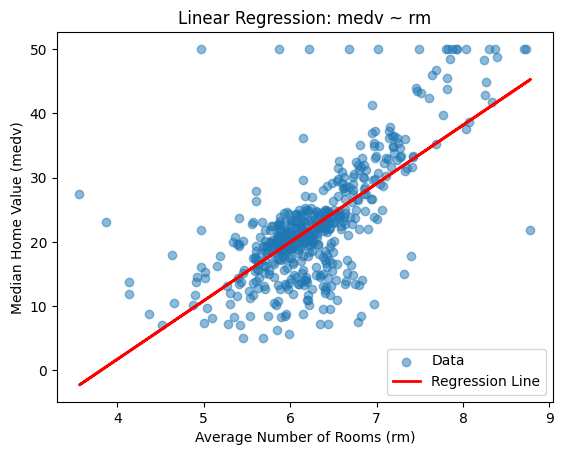

In [51]:
# Plot the regression line
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Extract the coefficient for 'rm' and the intercept from the model summary
coef_rm = model.params['rm']  # 'rm' coefficient
intercept = model.params['const']  # Intercept

# Scatter plot of 'rm' against 'medv'
plt.scatter(regression_data['rm'], regression_data['medv'], alpha=0.5, label="Data")

# Calculate the predicted values using the regression coefficients
predicted_medv = coef_rm * regression_data['rm'] + intercept

# Plot the linear regression line
plt.plot(regression_data['rm'], predicted_medv, color='red', linewidth=2, label="Regression Line")

# Set labels and title
plt.xlabel("Average Number of Rooms (rm)")
plt.ylabel("Median Home Value (medv)")
plt.title("Linear Regression: medv ~ rm")

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [27]:
spark.sparkContext.stop()